In [2]:
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta

In [3]:
#Loading Data and Taking last 100 Candles
btc = pd.read_csv("BTC-USD.csv")
btc["Date"] = pd.to_datetime(btc["Date"])

btcsubset = btc.iloc[-100:]

btcsubset

btcsubset.to_csv("btcusdlast100.csv", index=False)

/home/nomad/Desktop/PlsHireMe/PHMvenv/lib/python3.11/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


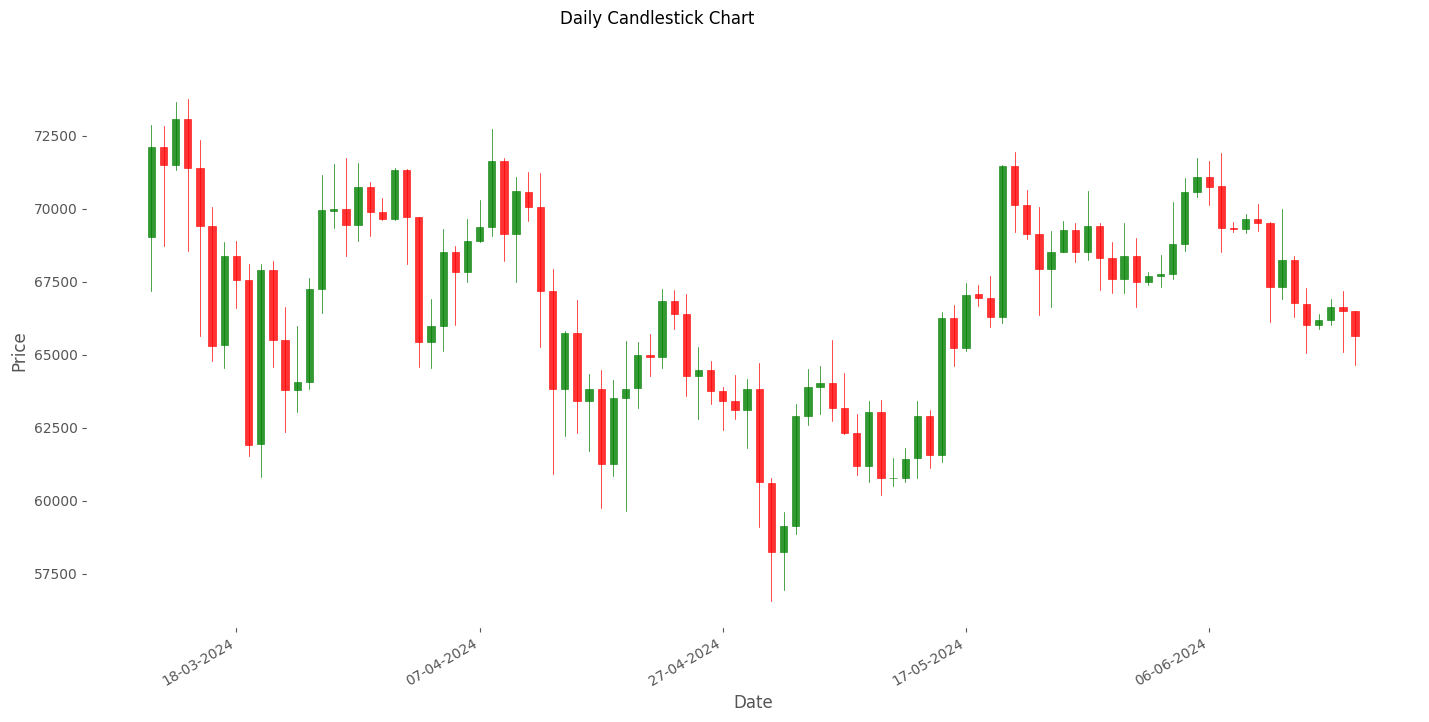

In [3]:
#Plotting last 100 Candles

btcbis = btcsubset.copy()

import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candles.png")

In [4]:
btcbisnp = btcbis.to_numpy() 
btcbisnp.shape

(100, 7)

In [5]:
#Calculating ZigZag
#CleaningUp ZigZag and Better Formula
#ZigZag Indicator on Closing Prices
zigzag = []
threshold = 2  # 10% threshold

#Appending First - Date and OpeningPrice
zigzag.append([btcbisnp[0][0], btcbisnp[0][1]])

StartPoint = btcbisnp[0][1]

for x in range(1, len(btcbisnp)):
    ClosingPrice = btcbisnp[x][4]
    #prevClosingPrice = btcbisnp[x-1][4]
    
    pchange = ((ClosingPrice - StartPoint) / StartPoint) * 100
    
    if abs(pchange) >= threshold:
        if len(zigzag) >= 2:   
            if (pchange > 0 and (zigzag[-1][-1] - zigzag[-2][-1]) > 0) or (pchange < 0 and (zigzag[-1][-1] - zigzag[-2][-1]) < 0):
                zigzag.pop()
                
        zigzag.append([btcbisnp[x][0], btcbisnp[x][4]])
        StartPoint = ClosingPrice
    
#Appending Last and Deleting Previous Last one - Date and ClosingPrice
zigzag.pop()
zigzag.append([btcbisnp[-1][0], btcbisnp[-1][4]])

In [6]:
#Converting to DF
zzdf = pd.DataFrame(zigzag, columns = ["Date", "ZZ"])
zzdf.head()

,Date,ZZ
0,2024-03-11,69020.546875
1,2024-03-13,73083.500000
2,2024-03-16,65315.117188
3,2024-03-17,68390.625000
4,2024-03-19,61912.773438


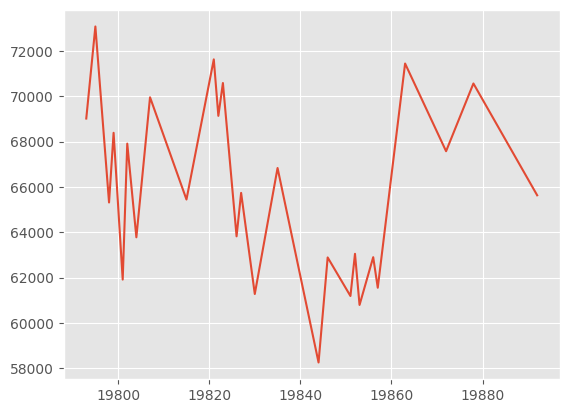

In [7]:
#Plotting ZigZag

newzzdf = zzdf.copy()

newzzdf['Date'] = pd.to_datetime(newzzdf['Date'])
newzzdf['Date'] = newzzdf['Date'].apply(mpl_dates.date2num)
newzzdf = newzzdf.astype(float)

plt.plot(newzzdf["Date"], newzzdf["ZZ"])

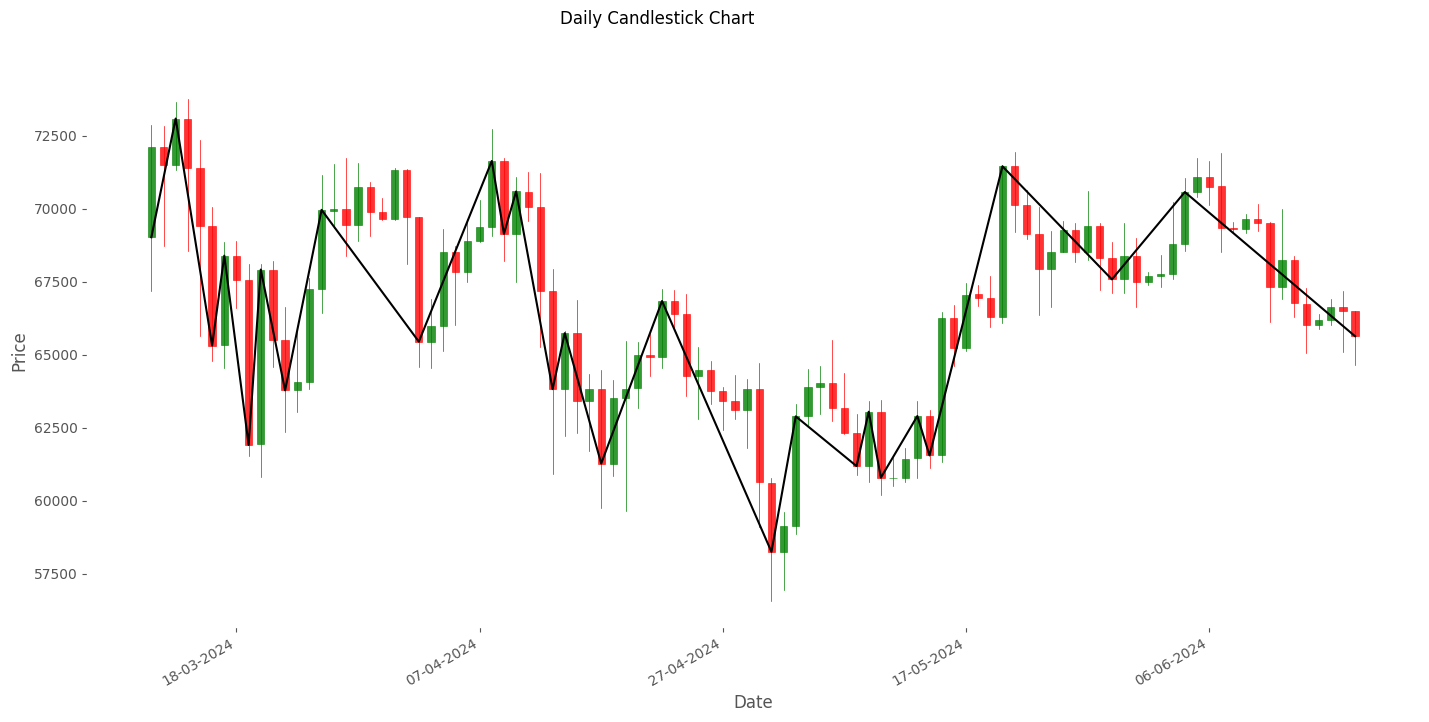

In [8]:
#Plotting ZigZag on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'])
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

In [9]:
#HL ZigZag
#Calculating ZigZag
#CleaningUp ZigZag and Better Formula
#ZigZag Indicator on Closing Prices
zigzag = []
threshold = 2  # 10% threshold

#Appending First - Date and OpeningPrice
zigzag.append([btcbisnp[0][0], btcbisnp[0][1]])

StartPoint = zigzag[0][1]

for x in range(1, len(btcbisnp)):

    High = btcbisnp[x][2]
    Low = btcbisnp[x][3]

    pchangehigh = ((High - StartPoint) / StartPoint) * 100
    pchangelow = ((Low - StartPoint) / StartPoint) * 100

    #print(pchangehigh, pchangelow)

    best = 0

    if abs(pchangehigh) > abs(pchangelow):
        best = pchangehigh
        level = High
    
    else:
        best = pchangelow
        level = Low

    #print(best, level)

    if len(zigzag) >= 2:   
        if (zigzag[-1][-1] - zigzag[-2][-1]) > 0 and High > zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcbisnp[x][0], High])
            StartPoint = High
            continue
                
        elif (zigzag[-1][-1] - zigzag[-2][-1]) < 0 and Low < zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcbisnp[x][0], Low])
            StartPoint = Low
            continue
    
    if abs(best) >= threshold:
        zigzag.append([btcbisnp[x][0], level])
        StartPoint = level 

In [10]:
zzdf = pd.DataFrame(zigzag, columns = ["Date", "ZZ"])
zzdf.head()

,Date,ZZ
0,2024-03-11,69020.546875
1,2024-03-14,73750.070313
2,2024-03-17,64545.316406
3,2024-03-18,68897.132813
4,2024-03-20,60807.785156


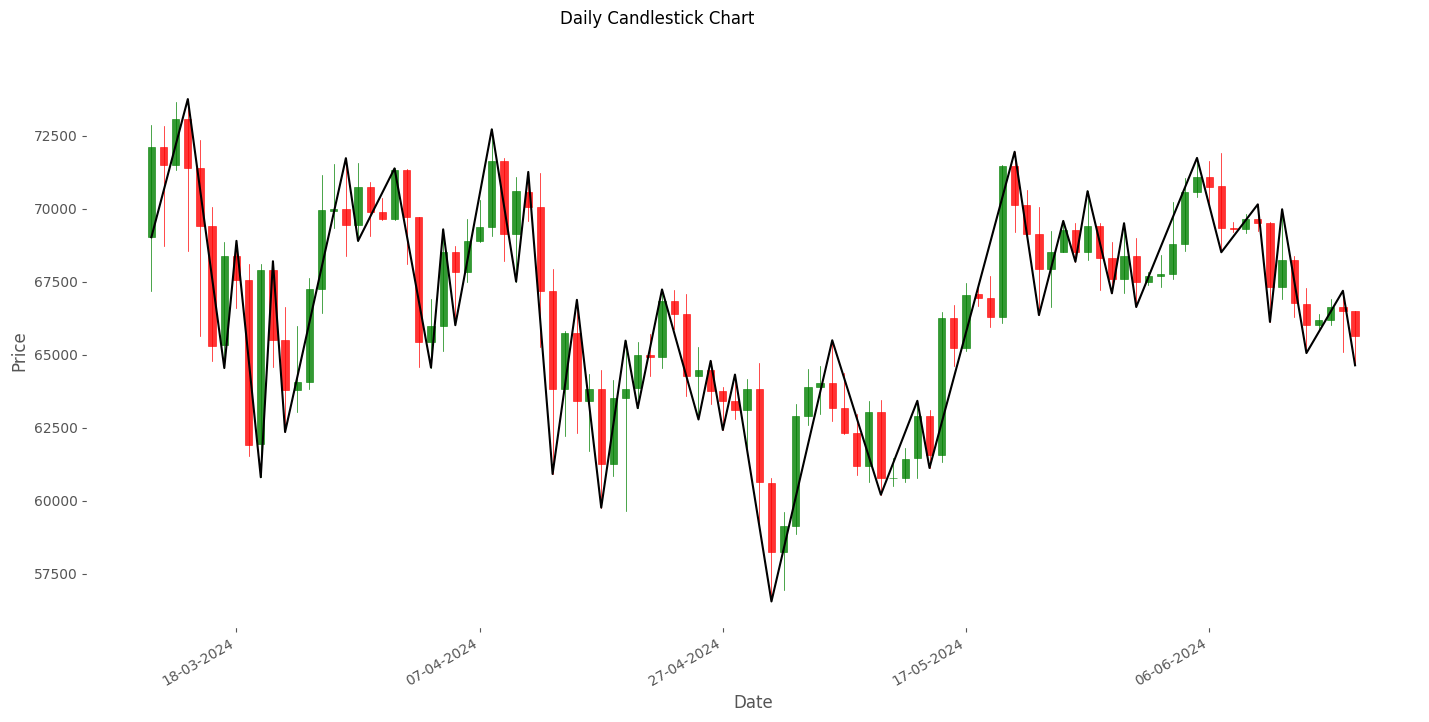

In [11]:
#Plotting ZigZag on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'])
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

In [12]:
#Converting ZZ DF to text
TextZZ = " ".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(zzdf.itertuples(index=False))])
TextZZ

'2024-03-11 00:00:00, 69020.55 2024-03-14 00:00:00, 73750.07 2024-03-17 00:00:00, 64545.32 2024-03-18 00:00:00, 68897.13 2024-03-20 00:00:00, 60807.79 2024-03-21 00:00:00, 68199.99 2024-03-22 00:00:00, 62355.37 2024-03-27 00:00:00, 71727.69 2024-03-28 00:00:00, 68895.51 2024-03-31 00:00:00, 71377.78 2024-04-03 00:00:00, 64559.9 2024-04-04 00:00:00, 69291.26 2024-04-05 00:00:00, 66011.48 2024-04-08 00:00:00, 72715.36 2024-04-10 00:00:00, 67503.56 2024-04-11 00:00:00, 71256.23 2024-04-13 00:00:00, 60919.11 2024-04-15 00:00:00, 66878.65 2024-04-17 00:00:00, 59768.59 2024-04-19 00:00:00, 65481.6 2024-04-20 00:00:00, 63172.4 2024-04-22 00:00:00, 67233.96 2024-04-25 00:00:00, 62783.63 2024-04-26 00:00:00, 64789.66 2024-04-27 00:00:00, 62424.72 2024-04-28 00:00:00, 64321.48 2024-05-01 00:00:00, 56555.29 2024-05-06 00:00:00, 65494.9 2024-05-10 00:00:00, 60208.78 2024-05-13 00:00:00, 63422.66 2024-05-14 00:00:00, 61123.77 2024-05-21 00:00:00, 71946.46 2024-05-23 00:00:00, 66356.95 2024-05-25 00

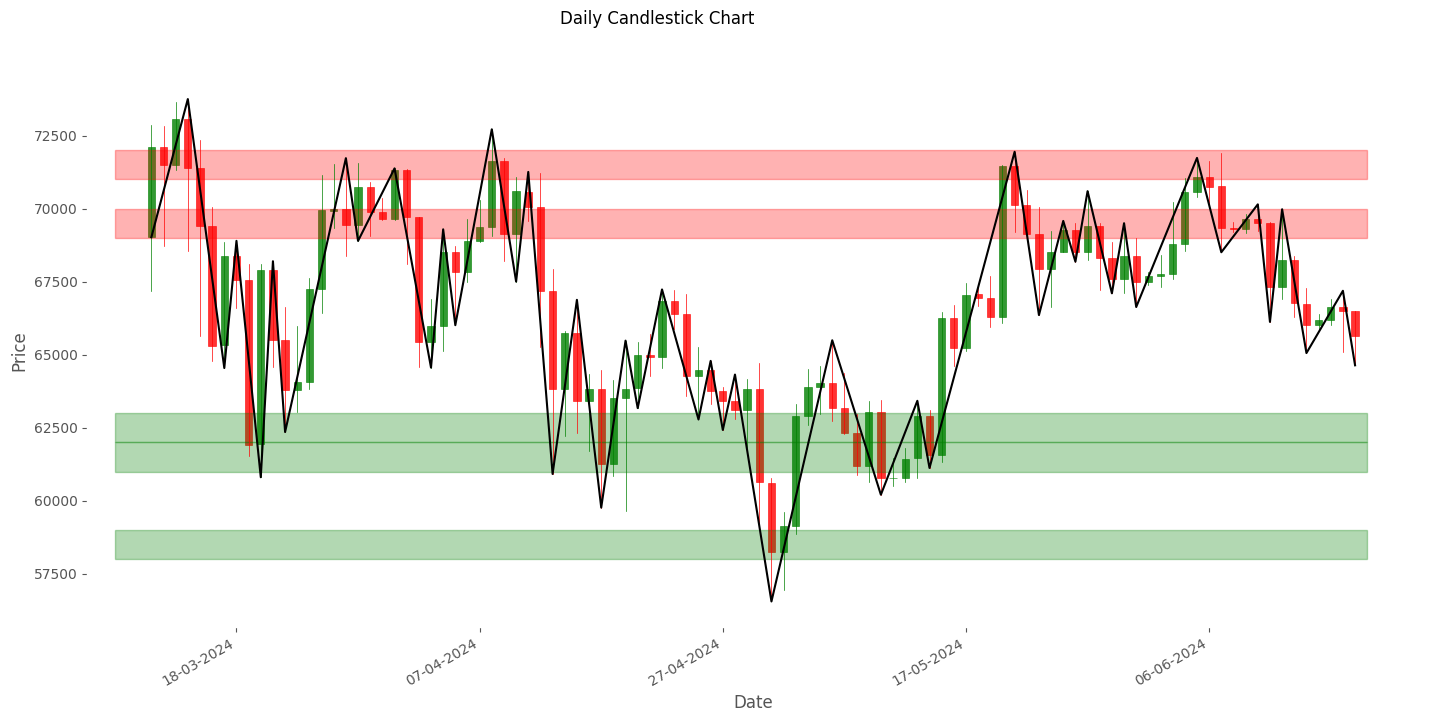

In [13]:
#Checkpoint One Output
#Resistance, 71000-72000, Strong, 4
#Resistance, 69000-70000, Weak, 3
#Support, 63000-64000, Strong, 5
#Support, 61000-62000, Weak, 3
#Support, 58000-59000, Minor, 1

from matplotlib.patches import Rectangle

#Plotting Checkpoint One

Res = [[71000, 72000], [69000, 70000]]

Supp = [[62000, 63000], [61000, 62000], [58000, 59000]]

plt.style.use('ggplot')

btcbis = btcsubset.copy()

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'])
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")


# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#add rectangle to plot
for x in Res:
    ax.add_patch(Rectangle((btcbis.Date.iloc[0] - timedelta(days=3), x[0]), timedelta(days=103), 1000,
             edgecolor = 'red',
             facecolor = 'red',
             fill=True,
             lw=1,
             alpha=0.3))

for x in Supp:
    ax.add_patch(Rectangle((btcbis.Date.iloc[0] - timedelta(days=3), x[0]), timedelta(days=103), 1000,
             edgecolor = 'green',
             facecolor = 'green',
             fill=True,
             lw=1,
             alpha=0.3))

plt.show()

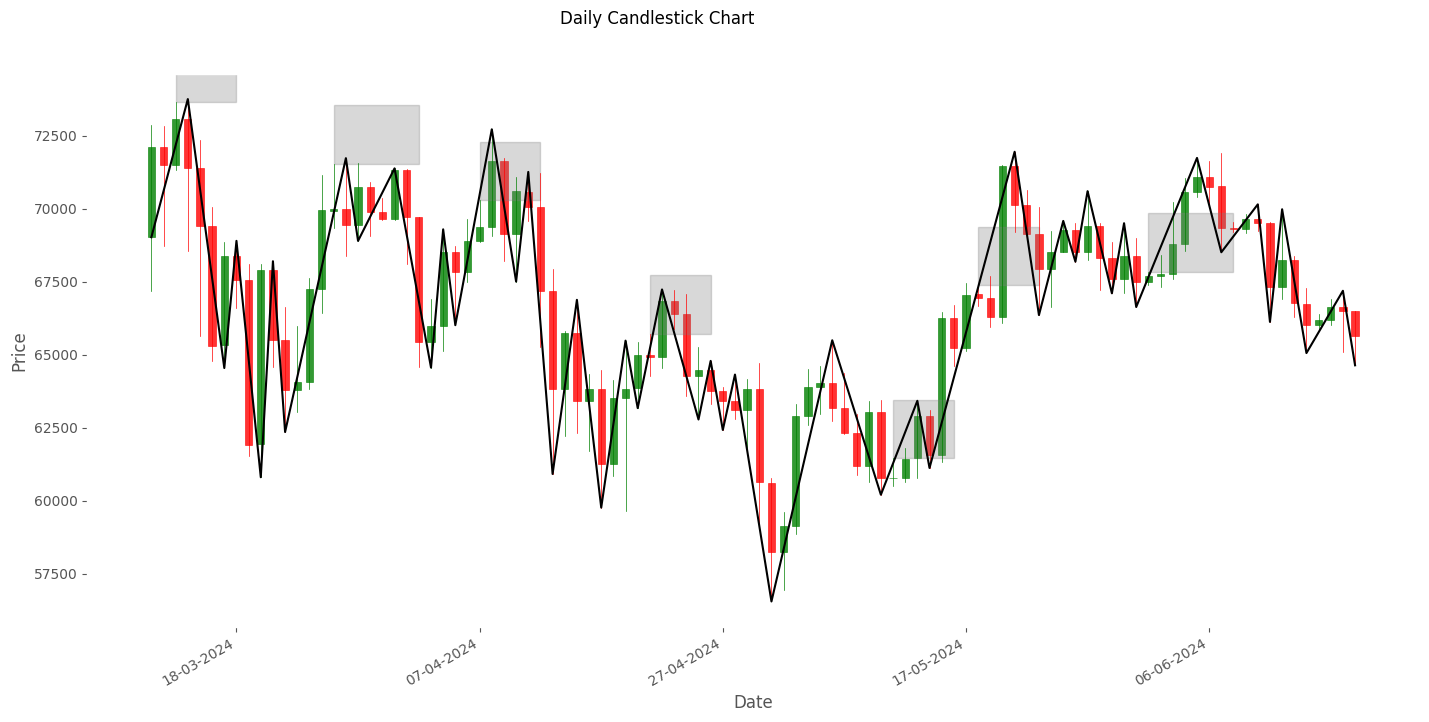

In [35]:
# Checkpoint Two Output - First Attempt
#Consolidation, 69000-70000, 2024-03-11, 7
#Consolidation, 63000-64000, 2024-05-03, 10
#Congestion, 61000-62000, 2024-05-08, 5

#Plotting Checkpoint One


CongCons = [["2024-03-13", 5],
            ["2024-03-26", 7],
            ["2024-04-07", 5],
            ["2024-04-21", 5],
            ["2024-05-11", 5],
            ["2024-05-18", 5],
            ["2024-06-01", 7],
           ]

plt.style.use('ggplot')

btcbis = btcsubset.copy()

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'])
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#add rectangle to plot
for x in CongCons:
    ax.add_patch(Rectangle((pd.to_datetime(x[0]), btcbis["High"][btcbis["Date"] == x[0]].values[0]), timedelta(days=x[-1]), 2000,
             edgecolor = 'gray',
             facecolor = 'gray',
             fill=True,
             lw=1,
             alpha=0.3))

plt.show()

In [34]:
btcbis["High"][btcbis["Date"] == CongCons[0][0]].values[0]

73637.476563

In [15]:
#Calculating Donchian Channel
Donchian = []
period = 10  # 10 Candles Range

highs = [x[2] for x in btcbisnp]
lows = [x[3] for x in btcbisnp]

for x in range(len(btcbisnp)):
    IndexFromLastCandle = len(btcbisnp)-1-x
    #print(len(highs[IndexFromLastCandle + 1 - period : IndexFromLastCandle + 1]))
    
    if IndexFromLastCandle >= period-1:
        HighestHigh = max(highs[IndexFromLastCandle + 1 - period : IndexFromLastCandle + 1])
        LowestLow = min(lows[IndexFromLastCandle + 1 - period : IndexFromLastCandle + 1])

    else:
        tempperiod = IndexFromLastCandle
        
        HighestHigh = max(highs[0 : tempperiod + 1])
        LowestLow = min(lows[0 : tempperiod + 1])

    Donchian.append([btcbisnp[x][0], HighestHigh, LowestLow])

In [16]:
#Calculating Donchian Channel
Donchian = []
period = 5 # 10 Candles Range

highs = [x[2] for x in btcbisnp]
lows = [x[3] for x in btcbisnp]

for x in range(1, len(btcbisnp)):

    if x <= period:
        HighestHigh = max(highs[0:x])
        LowestLow = min(lows[0:x])
        
    else:
        HighestHigh = max(highs[x-period:x])
        LowestLow = min(lows[x-period:x])

    Donchian.append([btcbisnp[x][0], HighestHigh, LowestLow])

In [17]:
Donchiandf = pd.DataFrame(Donchian, columns = ["Date", "UpperBound", "LowerBound"])

In [18]:
len(highs) == len(lows) == len(btcbisnp) 

True

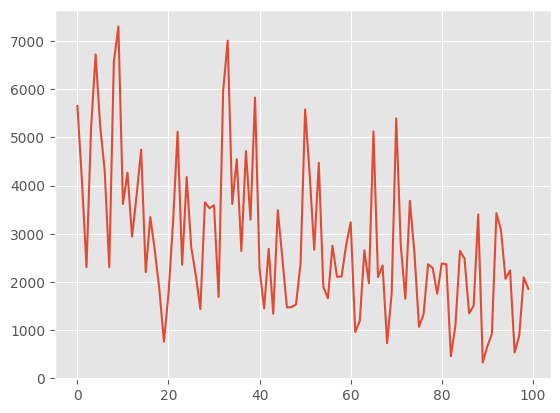

In [19]:
ATR = [[x[0], abs(x[2] - x[3])] for x in btcbisnp]
atrdf = pd.DataFrame(ATR, columns = ["Date", "ATR"])

plt.plot(atrdf["ATR"])

In [20]:
TextATR = " ".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(atrdf.itertuples(index=False))])
TextATR

'2024-03-11 00:00:00, 5655.83 2024-03-12 00:00:00, 4096.8 2024-03-13 00:00:00, 2303.38 2024-03-14 00:00:00, 5187.05 2024-03-15 00:00:00, 6726.44 2024-03-16 00:00:00, 5244.88 2024-03-17 00:00:00, 4300.4 2024-03-18 00:00:00, 2302.91 2024-03-19 00:00:00, 6570.75 2024-03-20 00:00:00, 7307.47 2024-03-21 00:00:00, 3619.07 2024-03-22 00:00:00, 4268.38 2024-03-23 00:00:00, 2937.91 2024-03-24 00:00:00, 3796.91 2024-03-25 00:00:00, 4747.76 2024-03-26 00:00:00, 2200.13 2024-03-27 00:00:00, 3345.76 2024-03-28 00:00:00, 2650.52 2024-03-29 00:00:00, 1836.44 2024-03-30 00:00:00, 754.43 2024-03-31 00:00:00, 1752.91 2024-04-01 00:00:00, 3231.4 2024-04-02 00:00:00, 5121.79 2024-04-03 00:00:00, 2354.42 2024-04-04 00:00:00, 4177.46 2024-04-05 00:00:00, 2714.28 2024-04-06 00:00:00, 2137.88 2024-04-07 00:00:00, 1432.8 2024-04-08 00:00:00, 3651.12 2024-04-09 00:00:00, 3529.59 2024-04-10 00:00:00, 3589.87 2024-04-11 00:00:00, 1684.42 2024-04-12 00:00:00, 5967.91 2024-04-13 00:00:00, 7012.32 2024-04-14 00:00:0

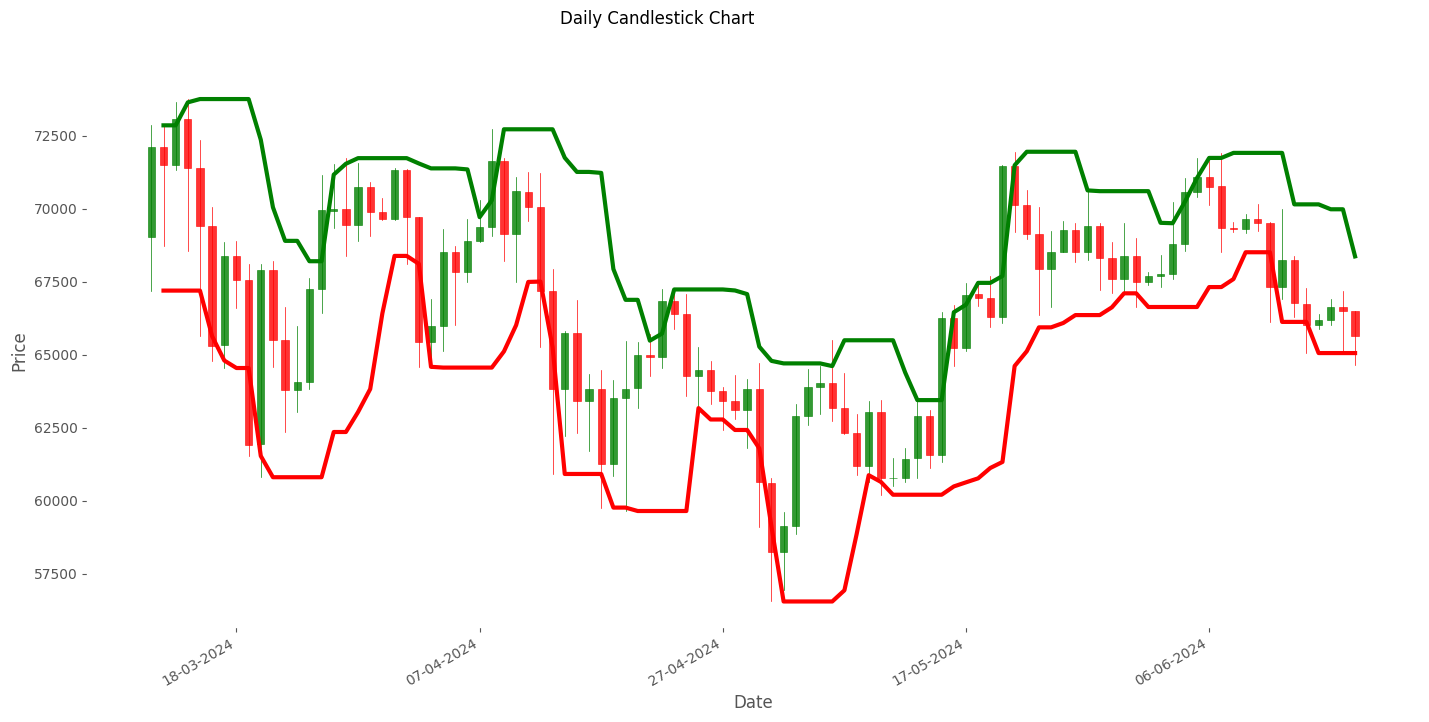

In [112]:
#PlottingDonchian
plt.style.use('ggplot')

btcbis = btcsubset.copy()

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'])
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

donchianplot = Donchiandf.copy()
donchianplot['Date'] = pd.to_datetime(donchianplot['Date'])
donchianplot['Date'] = donchianplot['Date'].apply(mpl_dates.date2num)
donchianplot = donchianplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

#ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

ax.plot(donchianplot["Date"], donchianplot["UpperBound"], color="green", lw=3)
ax.plot(donchianplot["Date"], donchianplot["LowerBound"], color="red", lw=3)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

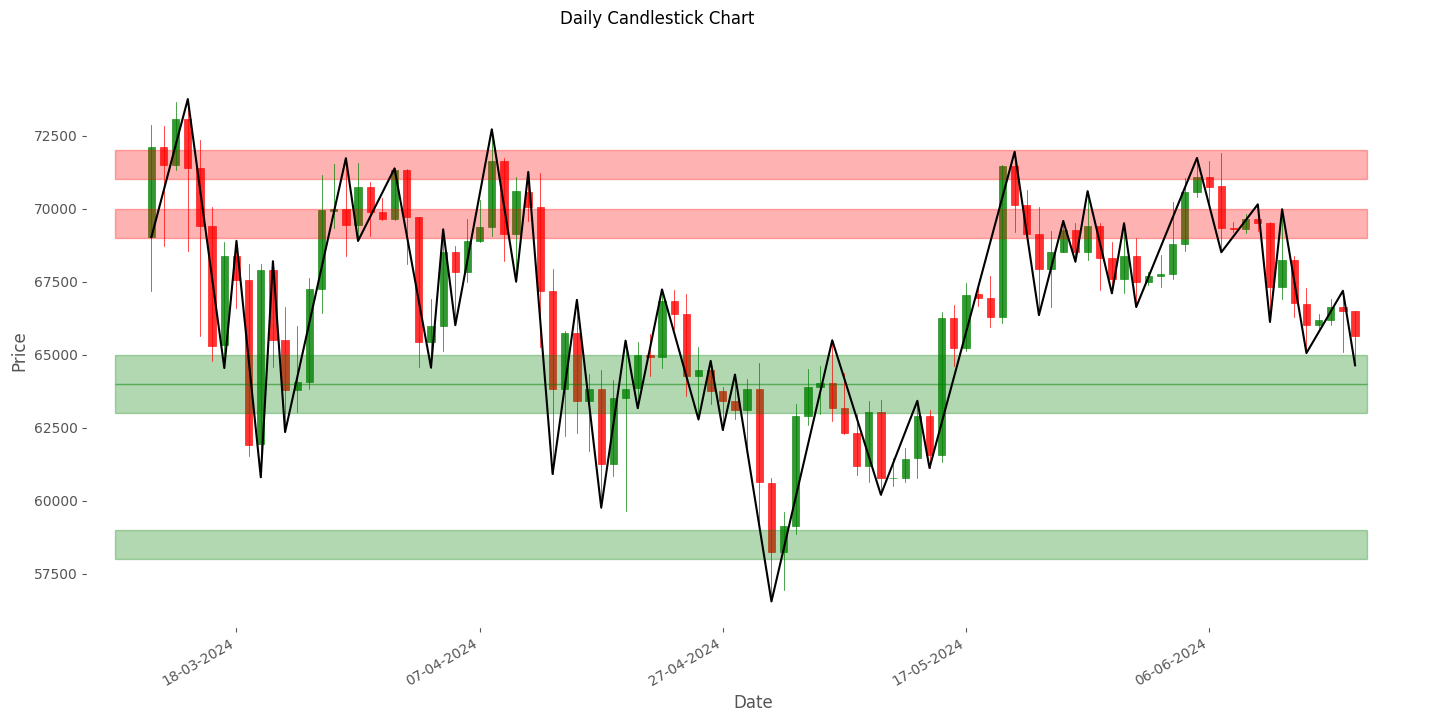

In [113]:
#Plotting Checkpoint One Second Attempt

from matplotlib.patches import Rectangle

#Plotting Checkpoint One

Res = [[71000, 72000], [69000, 70000]]

Supp = [[63000, 64000], [64000, 65000], [58000, 59000]]

plt.style.use('ggplot')

btcbis = btcsubset.copy()

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'])
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")


# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#add rectangle to plot
for x in Res:
    ax.add_patch(Rectangle((btcbis.Date.iloc[0] - timedelta(days=3), x[0]), timedelta(days=103), 1000,
             edgecolor = 'red',
             facecolor = 'red',
             fill=True,
             lw=1,
             alpha=0.3))

for x in Supp:
    ax.add_patch(Rectangle((btcbis.Date.iloc[0] - timedelta(days=3), x[0]), timedelta(days=103), 1000,
             edgecolor = 'green',
             facecolor = 'green',
             fill=True,
             lw=1,
             alpha=0.3))

plt.show()

In [47]:
pd.to_datetime("11-03-2024")

Timestamp('2024-11-03 00:00:00')

In [55]:
btcbis.Date.iloc[0]

Timestamp('2024-03-11 00:00:00')